In [1]:
import sys, os
os.listdir()
sys.path.append('/usr/local/anaconda3/lib/python3.6/site-packages')
sys.path.append('/home/snuthakk/.local/bin')
import numpy as np
import pandas as pd

In [26]:
df = pd.read_csv('diag_top10.csv')
df.head()

,ICD9_CODE,TEXT
0,41401,Admission Date: [**2146-8-29**] Dischar...
1,41401,"Normal sinus rhythm, rate 96\nRight bundle bra..."
2,41401,"Normal sinus rhythm, rate 80\nRight bundle bra..."
3,41401,"Normal sinus rhythm, rate 85\nRight bundle bra..."
4,41401,[**2146-8-31**] 8:19 PM\n CHEST (PA & LAT) ...


In [27]:
len(df)

677738

In [28]:
df['ICD9_CODE'].nunique()

10

In [29]:
df['ICD9_CODE'].value_counts()

V3001    157174
V3101    109767
V3000     87594
0389      76775
41401     64187
51881     57269
41071     50747
431       28037
4241      25728
486       20460
Name: ICD9_CODE, dtype: int64

In [30]:
df['ICD9_CODE'].unique()

array(['41401', 'V3001', 'V3000', 'V3101', '41071', '431', '4241', '0389',
       '51881', '486'], dtype=object)

# diagnosis

In [31]:
proce = df

In [32]:
proce.head()

,ICD9_CODE,TEXT
0,41401,Admission Date: [**2146-8-29**] Dischar...
1,41401,"Normal sinus rhythm, rate 96\nRight bundle bra..."
2,41401,"Normal sinus rhythm, rate 80\nRight bundle bra..."
3,41401,"Normal sinus rhythm, rate 85\nRight bundle bra..."
4,41401,[**2146-8-31**] 8:19 PM\n CHEST (PA & LAT) ...


In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
proce['ICD9_CODE'] = le.fit_transform(proce['ICD9_CODE'].astype('str'))

In [34]:
proce.head()

,ICD9_CODE,TEXT
0,2,Admission Date: [**2146-8-29**] Dischar...
1,2,"Normal sinus rhythm, rate 96\nRight bundle bra..."
2,2,"Normal sinus rhythm, rate 80\nRight bundle bra..."
3,2,"Normal sinus rhythm, rate 85\nRight bundle bra..."
4,2,[**2146-8-31**] 8:19 PM\n CHEST (PA & LAT) ...


In [35]:
le.classes_

array(['0389', '41071', '41401', '4241', '431', '486', '51881', 'V3000',
       'V3001', 'V3101'], dtype=object)

In [36]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'0389': 0, '41071': 1, '41401': 2, '4241': 3, '431': 4, '486': 5, '51881': 6, 'V3000': 7, 'V3001': 8, 'V3101': 9}


In [14]:
proce=proce.rename(columns={'ICD9_CODE': 'labels', 'TEXT':'text'})

In [15]:
proce.columns

Index(['labels', 'text'], dtype='object')

In [16]:
from sklearn.model_selection import train_test_split
trn_texts,val_texts = train_test_split(proce, test_size=0.3)

In [17]:
len(trn_texts), len(val_texts)

(474416, 203322)

In [18]:
trn_texts.head()

,labels,text
412900,9,NPN 1900-0700 cont.\n\n\n#9Skin integrity. O: ...
602015,2,CVICU\n HPI:\n HD6\n [**4-25**] POD 1\n ...
73554,10,[** 1023**] Note\nI agree with above assessmen...
81148,10,Neonatology NP NOte\nPLease refer to atending ...
265240,9,"NPN 7A-7P\n\n\n#1 Remains in nasal cannula, 20..."


In [19]:
from fastai.text import *
import html

In [20]:
torch.cuda.set_device(2)

In [21]:
BOS = 'xbos'  # beginning-of-sentence tag
FLD = 'xfld'  # data field tag

PATH=Path('/home/snuthakk/Capstone/')

In [22]:
CLAS_PATH=Path('/home/snuthakk/Capstone/mimic_diag_seq1_top10_clas_70:30split/')
CLAS_PATH.mkdir(exist_ok=True)

LM_PATH=Path('/home/snuthakk/Capstone/mimic_diag_seq1_top10_lm_70:30split/')
LM_PATH.mkdir(exist_ok=True)

In [23]:
trn_texts.to_csv(CLAS_PATH/'train.csv', header=False, index=False)
val_texts.to_csv(CLAS_PATH/'test.csv', header=False, index=False)

In [24]:
# trn_texts = pd.read_csv(CLAS_PATH/'train.csv', header=None)
# val_texts = pd.read_csv(CLAS_PATH/'test.csv', header=None)

In [25]:
trn_texts['labels'] = 0
val_texts['labels'] = 0

/home/snuthakk/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/snuthakk/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
trn_texts.head()

,labels,text
412900,0,NPN 1900-0700 cont.\n\n\n#9Skin integrity. O: ...
602015,0,CVICU\n HPI:\n HD6\n [**4-25**] POD 1\n ...
73554,0,[** 1023**] Note\nI agree with above assessmen...
81148,0,Neonatology NP NOte\nPLease refer to atending ...
265240,0,"NPN 7A-7P\n\n\n#1 Remains in nasal cannula, 20..."


In [27]:
val_texts.head()

,labels,text
319954,0,Demographics\n Day of intubation:\n Day of...
170291,0,"NNP Physical Exam\nPE: pink, under phototherap..."
177786,0,NPN 7a-7p\n\n\n#2: TF: 150cc/k/d. Conts on BM...
1736,0,MICU/SICU NPN/EVENT HD #5\nEVENT: ~0510 this A...
254246,0,NPN (0700-1500)\n\n6 Infant with Potential Sep...


In [28]:
trn_texts.to_csv(LM_PATH/'train.csv', header=False, index=False)
val_texts.to_csv(LM_PATH/'test.csv', header=False, index=False)

# 3 Language model tokens

In [29]:
chunksize=10000

In [30]:
import re
re1 = re.compile(r'  +')

def fixup(x):
    x = x.replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>','u_n').replace(' @.@ ','.').replace(
        ' @-@ ','-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x))

In [31]:
def get_texts(df, n_lbls=1):
    labels = df.iloc[:,range(n_lbls)].values.astype(np.int64)
    texts = f'\n{BOS} {FLD} 1 ' + df[n_lbls].astype(str)
    for i in range(n_lbls+1, len(df.columns)): texts += f' {FLD} {i-n_lbls} ' + df[i].astype(str)
    texts = list(texts.apply(fixup).values)
    
    tok = Tokenizer().proc_all_mp(partition_by_cores(texts))
    return tok, list(labels)

In [32]:
def get_all(df, n_lbls):
    tok, labels = [], []
    for i, r in enumerate(df):
        print(i)
        tok_, labels_ = get_texts(r, n_lbls)
        tok += tok_;
        labels += labels_
    return tok, labels

In [33]:
df_trn = pd.read_csv(LM_PATH/'train.csv', header=None, chunksize=chunksize)
df_val = pd.read_csv(LM_PATH/'test.csv', header=None, chunksize=chunksize)

In [ ]:
tok_trn, trn_labels = get_all(df_trn, 1)
tok_val, val_labels = get_all(df_val, 1)

0
1
2
3
4
5
6
7
8


In [ ]:
# LM_PATH=Path('/home/snuthakk/Capstone/')
(LM_PATH/'tmp').mkdir(exist_ok=True)

In [ ]:
np.save(LM_PATH/'tmp'/'tok_trn.npy', tok_trn)

In [ ]:
np.save(LM_PATH/'tmp'/'tok_val.npy', tok_val)

In [ ]:
# tok_trn = np.load(LM_PATH/'tmp'/'tok_trn.npy')
# tok_val = np.load(LM_PATH/'tmp'/'tok_val.npy')

In [ ]:
freq = Counter(p for o in tok_trn for p in o)
freq.most_common(25)

In [43]:
max_vocab = 60000
min_freq = 3

In [44]:
itos = [o for o,c in freq.most_common(max_vocab) if c>min_freq]
itos.insert(0, '_pad_')
itos.insert(0, '_unk_')

In [45]:
stoi = collections.defaultdict(lambda:0, {v:k for k,v in enumerate(itos)})
len(itos)

60002

In [46]:
trn_lm = np.array([[stoi[o] for o in p] for p in tok_trn])

In [47]:
val_lm = np.array([[stoi[o] for o in p] for p in tok_val])

In [48]:
np.save(LM_PATH/'tmp'/'trn_ids.npy', trn_lm)

In [49]:
np.save(LM_PATH/'tmp'/'val_ids.npy', val_lm)

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [50]:
pickle.dump(itos, open(LM_PATH/'tmp'/'itos.pkl', 'wb'))

In [51]:
# trn_lm = np.load(LM_PATH/'tmp'/'trn_ids.npy')

In [52]:
# val_lm = np.load(LM_PATH/'tmp'/'val_ids.npy')

In [53]:
# itos = pickle.load(open(LM_PATH/'tmp'/'itos.pkl', 'rb'))

In [54]:
vs=len(itos)
vs,len(trn_lm)

(60002, 532190)

# wikitext103 conversion

In [64]:
em_sz,nh,nl = 400,1150,3

In [65]:
PRE_PATH = PATH/'models'/'wt103'
PRE_LM_PATH = PRE_PATH/'fwd_wt103.h5'

In [66]:
wgts = torch.load(PRE_LM_PATH, map_location=lambda storage, loc: storage)

In [67]:
enc_wgts = to_np(wgts['0.encoder.weight'])
row_m = enc_wgts.mean(0)

In [68]:
itos2 = pickle.load((PRE_PATH/'itos_wt103.pkl').open('rb'))
stoi2 = collections.defaultdict(lambda:-1, {v:k for k,v in enumerate(itos2)})

In [69]:
new_w = np.zeros((vs, em_sz), dtype=np.float32)
for i,w in enumerate(itos):
    r = stoi2[w]
    new_w[i] = enc_wgts[r] if r>=0 else row_m

In [70]:
wgts['0.encoder.weight'] = T(new_w)
wgts['0.encoder_with_dropout.embed.weight'] = T(np.copy(new_w))
wgts['1.decoder.weight'] = T(np.copy(new_w))

# Language model

In [113]:
torch.cuda.set_device(0)

In [114]:
torch.cuda.current_device()

0

In [115]:
wd=1e-7
bptt=70
bs=8
opt_fn = partial(optim.Adam, betas=(0.8, 0.99))

In [116]:
trn_dl = LanguageModelLoader(np.concatenate(trn_lm), bs, bptt)
val_dl = LanguageModelLoader(np.concatenate(val_lm), bs, bptt)
md = LanguageModelData(PATH, 1, vs, trn_dl, val_dl, bs=bs, bptt=bptt)

In [117]:
drops = np.array([0.25, 0.1, 0.2, 0.02, 0.15])*0.6

In [118]:
learner= md.get_model(opt_fn, em_sz, nh, nl, 
    dropouti=drops[0], dropout=drops[1], wdrop=drops[2], dropoute=drops[3], dropouth=drops[4])

In [119]:
learner.metrics = [accuracy]

In [120]:
learner.freeze_to(-1)

In [121]:
learner.model.load_state_dict(wgts)

In [122]:
lr=1e-3
lrs = lr

In [123]:
learner.fit(lrs/2, 1, wds=wd, use_clr=(32,2), cycle_len=1)

  7%|▋         | 24165/361607 [35:58<8:22:27, 11.19it/s, loss=4.49]

KeyboardInterrupt: 

  7%|▋         | 24165/361607 [36:11<8:25:29, 11.13it/s, loss=4.49]

In [ ]:
learner.save('lm_last_ft')

In [ ]:
learner.load('lm_last_ft')

In [ ]:
learner.unfreeze()

In [83]:
learner.lr_find(start_lr=lrs/10, end_lr=lrs*10, linear=True)

  7%|▋         | 19882/269271 [50:57<10:39:14,  6.50it/s, loss=2.15]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  8%|▊         | 22054/269271 [56:30<10:33:28,  6.50it/s, loss=2.23]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  9%|▉         | 24304/269271 [1:02:15<10:27:26,  6.51it/s, loss=2.14]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 10%|▉         | 26432/269271 [1:07:41<10:21:57,  6.51it/s, loss=2.04]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 11%|█         | 28706/269271 [1:13:30<10:16:04,  6.51it/s, loss=2.22]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 11%|█▏        | 30951/269271 [1:19:14<10:10:11,  6.51it/s, loss=2.07]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 12%|█▏        | 33207/269271 [1:25:00<10:04:19,  6.51it/s, loss=2.12]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 38%|███▊      | 103307/269271 [4:24:46<7:05:21,  6.50it/s, loss=2.37]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 39%|███▉      | 105413/269271 [4:30:09<6:59:56,  6.50it/s, loss=2.31]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 40%|███▉      | 107665/269271 [4:35:56<6:54:10,  6.50it/s, loss=2.33]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 41%|████      | 109763/269271 [4:41:19<6:48:49,  6.50it/s, loss=2.39]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 42%|████▏     | 112032/269271 [4:47:07<6:42:59,  6.50it/s, loss=2.33]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 42%|████▏     | 114311/269271 [4:52:57<6:37:08,  6.50it/s, loss=2.25]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 43%|████▎     | 116459/269271 [4:58:29<6:31:39,  6.50it/s, loss=2.35]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 44%|████▍     | 118710/269271 [5:04:16<6:25:54,  6.50it/s, loss=2.3] 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 45%|████▍     | 120978/269271 [5:10:04<6:20:04,  6.50it/s, loss=2.44]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 46%|████▌     | 123095/269271 [5:15:30<6:14:39,  6.50it/s, loss=2.66]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 46%|████▌     | 124381/269271 [5:18:47<6:11:20,  6.50it/s, loss=2.79]

RuntimeError: cuda runtime error (2) : out of memory at /pytorch/torch/lib/THC/generic/THCStorage.cu:58

In [46]:
learner.sched.plot()

AttributeError: 'CircularLR' object has no attribute 'plot'

In [ ]:
learner.fit(lrs, 1, wds=wd, use_clr=(20,10), cycle_len=2)

In [ ]:
learner.save('lm1')

In [ ]:
learner.save_encoder('lm1_enc')

In [ ]:
learner.sched.plot_loss()

# Classifier tokens

In [55]:
df_trn = pd.read_csv(CLAS_PATH/'train.csv', header=None, chunksize=chunksize)
df_val = pd.read_csv(CLAS_PATH/'test.csv', header=None, chunksize=chunksize)

In [56]:
tok_trn, trn_labels = get_all(df_trn, 1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54


In [57]:
(CLAS_PATH/'tmp').mkdir(exist_ok=True)

In [58]:
np.save(CLAS_PATH/'tmp'/'tok_trn.npy', tok_trn)

In [59]:
np.save(CLAS_PATH/'tmp'/'trn_labels.npy', trn_labels)

In [60]:
tok_val, val_labels = get_all(df_val, 1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [61]:
np.save(CLAS_PATH/'tmp'/'tok_val.npy', tok_val)

In [62]:
np.save(CLAS_PATH/'tmp'/'val_labels.npy', val_labels)

In [63]:
# tok_trn = np.load(CLAS_PATH/'tmp'/'tok_trn.npy')

In [64]:
# tok_val = np.load(CLAS_PATH/'tmp'/'tok_val.npy')

In [65]:
itos = pickle.load((LM_PATH/'tmp'/'itos.pkl').open('rb'))
stoi = collections.defaultdict(lambda:0, {v:k for k,v in enumerate(itos)})
len(itos)

60002

In [66]:
trn_clas = np.array([[stoi[o] for o in p] for p in tok_trn])

In [67]:
val_clas = np.array([[stoi[o] for o in p] for p in tok_val])

In [68]:
np.save(CLAS_PATH/'tmp'/'trn_ids.npy', trn_clas)

In [69]:
np.save(CLAS_PATH/'tmp'/'val_ids.npy', val_clas)

# Classifier

In [5]:
trn_clas = np.load(CLAS_PATH/'tmp'/'trn_ids.npy')
val_clas = np.load(CLAS_PATH/'tmp'/'val_ids.npy')

In [6]:
trn_labels = np.squeeze(np.load(CLAS_PATH/'tmp'/'trn_labels.npy'))
val_labels = np.squeeze(np.load(CLAS_PATH/'tmp'/'val_labels.npy'))

In [15]:
bptt,em_sz,nh,nl = 70,400,1150,3
vs = len(itos)
opt_fn = partial(optim.Adam, betas=(0.8, 0.99))
bs = 16

In [16]:
min_lbl = trn_labels.min()
trn_labels -= min_lbl
val_labels -= min_lbl
c=int(trn_labels.max())+1

In [17]:
trn_ds = TextDataset(trn_clas, trn_labels)
val_ds = TextDataset(val_clas, val_labels)
trn_samp = SortishSampler(trn_clas, key=lambda x: len(trn_clas[x]), bs=bs//2)
val_samp = SortSampler(val_clas, key=lambda x: len(val_clas[x]))
trn_dl = DataLoader(trn_ds, bs//2, transpose=True, num_workers=1, pad_idx=1, sampler=trn_samp)
val_dl = DataLoader(val_ds, bs, transpose=True, num_workers=1, pad_idx=1, sampler=val_samp)
md = ModelData(PATH, trn_dl, val_dl)

In [18]:
# part 1
dps = np.array([0.4, 0.5, 0.05, 0.3, 0.1])

In [19]:
dps = np.array([0.4,0.5,0.05,0.3,0.4])*0.5

In [20]:
m = get_rnn_classifer(bptt, 20*70, c, vs, emb_sz=em_sz, n_hid=nh, n_layers=nl, pad_token=1,
          layers=[em_sz*3, 50, c], drops=[dps[4], 0.1],
          dropouti=dps[0], wdrop=dps[1], dropoute=dps[2], dropouth=dps[3])

In [21]:
opt_fn = partial(optim.Adam, betas=(0.7, 0.99))

In [22]:
learn = RNN_Learner(md, TextModel(to_gpu(m)), opt_fn=opt_fn)
learn.reg_fn = partial(seq2seq_reg, alpha=2, beta=1)
learn.clip=.25
learn.metrics = [accuracy]

In [23]:
lr=3e-3
lrm = 2.6
lrs = np.array([lr/(lrm**4), lr/(lrm**3), lr/(lrm**2), lr/lrm, lr])

In [24]:
lrs=np.array([1e-4,1e-4,1e-4,1e-3,1e-2])

In [25]:
wd = 1e-7
wd = 0
learn.load_encoder('lm1_enc')

In [101]:
learn.freeze_to(-1)

In [103]:
#Cudnn_status_execution_failed
#https://discuss.pytorch.org/t/cudnn-status-execution-failed/4441
torch.backends.cudnn.enabled=False

In [ ]:
learn.lr_find(lrs/1000)

  4%|▍         | 1500/37500 [30:08<12:03:14,  1.21s/it, loss=5.46]

In [ ]:
learn.sched.plot()

In [ ]:
learn.fit(lrs, 1, wds=wd, cycle_len=1, use_clr=(8,3))

In [ ]:
learn.save('clas_0')

In [ ]:
learn.load('clas_0')

In [ ]:
learn.freeze_to(-2)

In [ ]:
learn.fit(lrs, 1, wds=wd, cycle_len=1, use_clr=(8,3))

In [ ]:
learn.save('clas_1')

In [ ]:
learn.load('clas_1')

In [26]:
learn.unfreeze()

In [27]:
learn.fit(lrs, 1, wds=wd, cycle_len=1, use_clr=(32,10))

 18%|█▊        | 6735/37500 [3:18:07<15:05:01,  1.77s/it, loss=3.75]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 97%|█████████▋| 36188/37500 [17:39:46<38:25,  1.76s/it, loss=3.22]  

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



epoch      trn_loss   val_loss   accuracy                          
    0      3.481111   10.35775   0.128807  



[array([10.35775]), 0.12880681085008436]

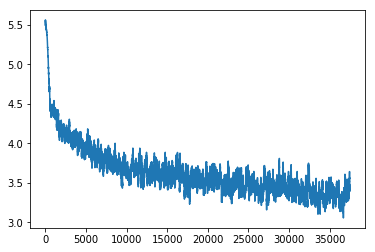

In [31]:
learn.sched.plot_loss()

In [30]:
learn.save('clas_2')

# Fin

In [ ]:
learn.sched.plot_loss()